# Lab7

11490434/11490434 [==============================] - 2s 0us/step


<ipython-input-1-f4c04fa1fad5>:49: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier=KerasClassifier(build_model)


Epoch 1/10
1500/1500 [==============================] - 15s 2ms/step - loss: 0.8455 - accuracy: 0.9023
Epoch 2/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1982 - accuracy: 0.9640
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0970 - accuracy: 0.9778
Epoch 4/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9841
Epoch 5/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0473 - accuracy: 0.9871
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0306 - accuracy: 0.9906
Epoch 7/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0249 - accuracy: 0.9928
Epoch 8/10
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0203 - accuracy: 0.9940
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0154 - accuracy: 0.9953
Epoch 10/10
375/375 [==============================] - 1s 2ms/step - loss: 0.1936

<ipython-input-1-f4c04fa1fad5>:131: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier=KerasClassifier(build_model)


Epoch 1/10
1250/1250 [==============================] - 3s 2ms/step - loss: 12.1783 - accuracy: 0.2955
Epoch 2/10
1250/1250 [==============================] - 3s 2ms/step - loss: 4.0222 - accuracy: 0.4045
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.6785 - accuracy: 0.4595
Epoch 4/10
1250/1250 [==============================] - 3s 2ms/step - loss: 2.0322 - accuracy: 0.5000
Epoch 5/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.6085 - accuracy: 0.5300
Epoch 6/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3923 - accuracy: 0.5600
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.2564 - accuracy: 0.5893
Epoch 8/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1474 - accuracy: 0.6188
Epoch 9/10
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0658 - accuracy: 0.6418
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.3936

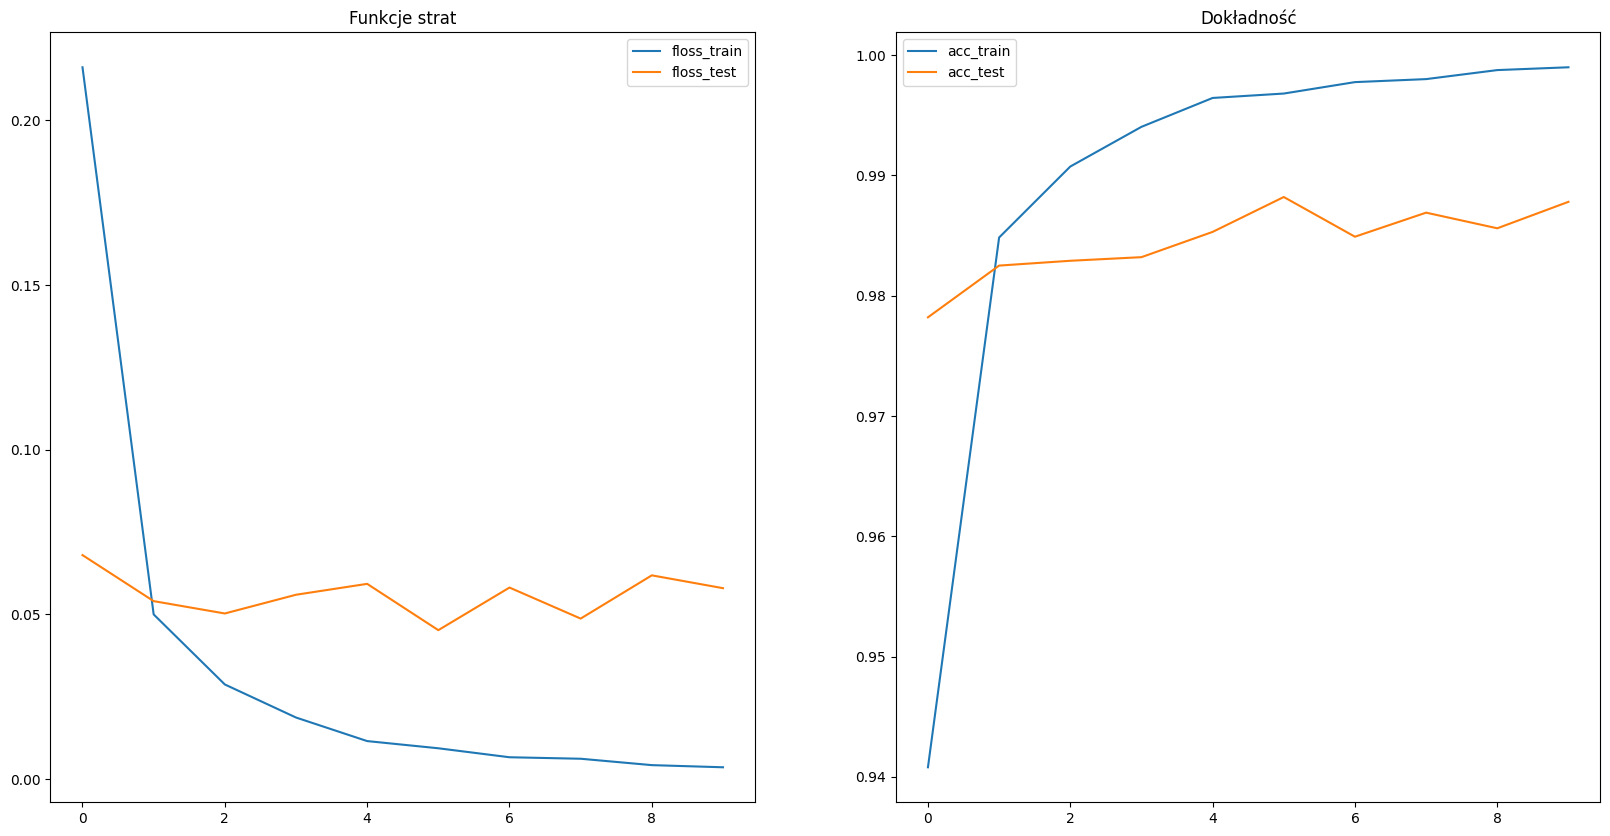

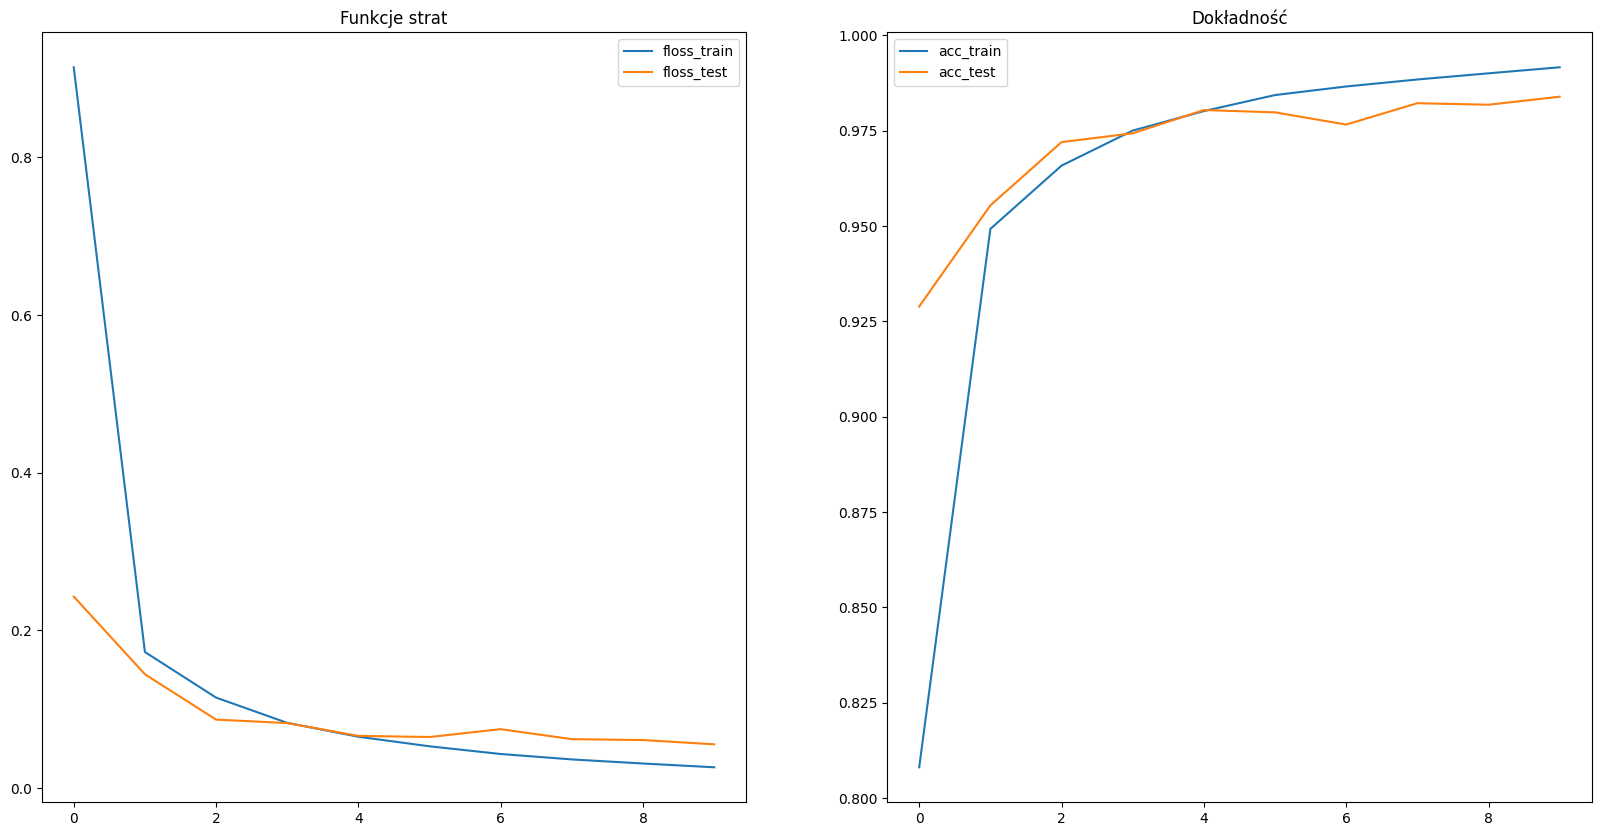

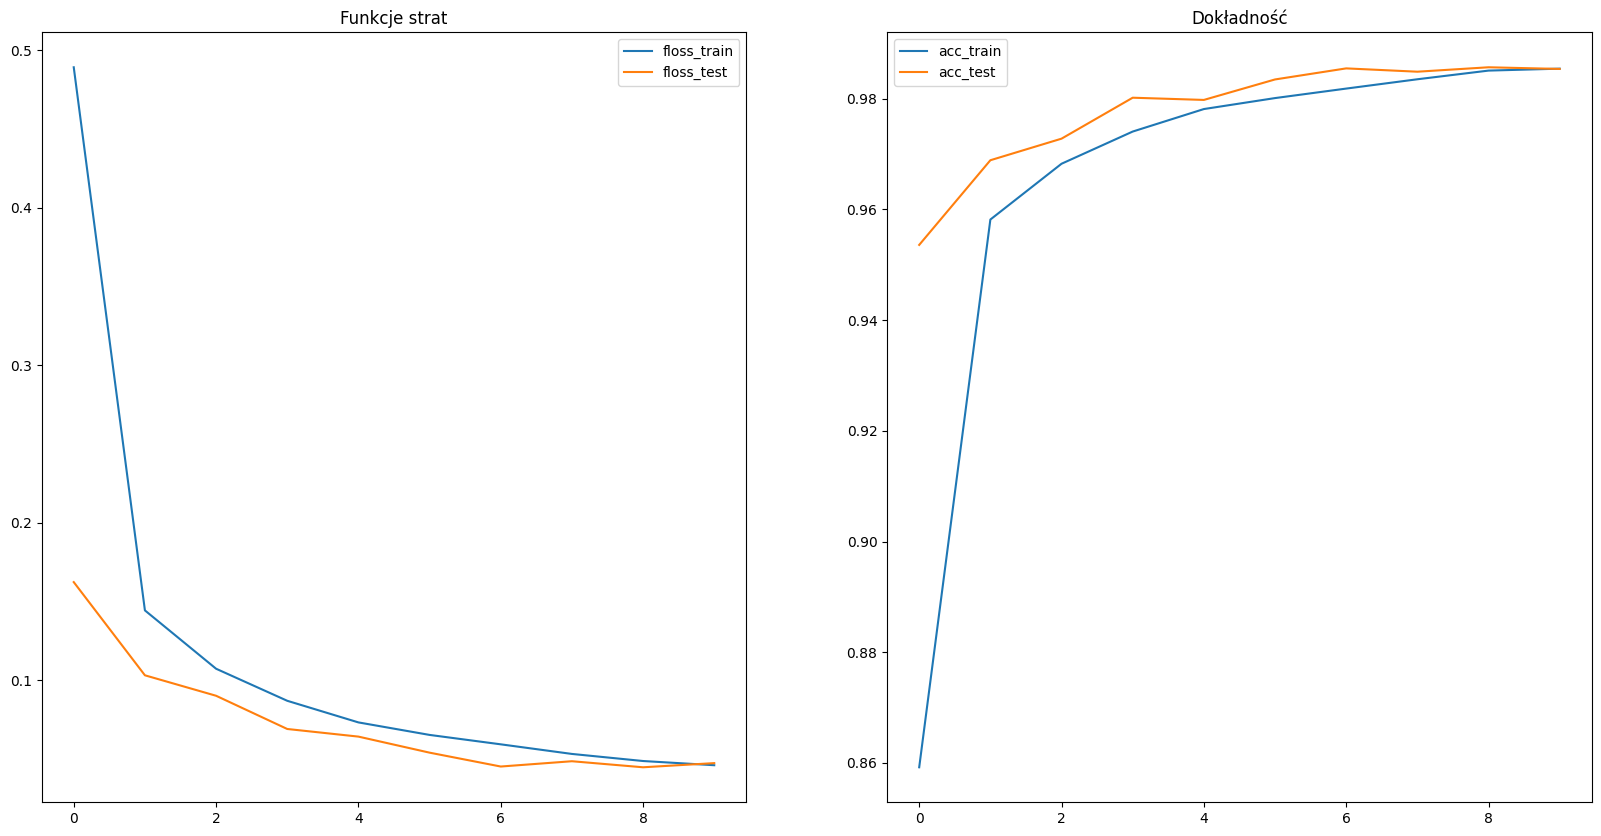

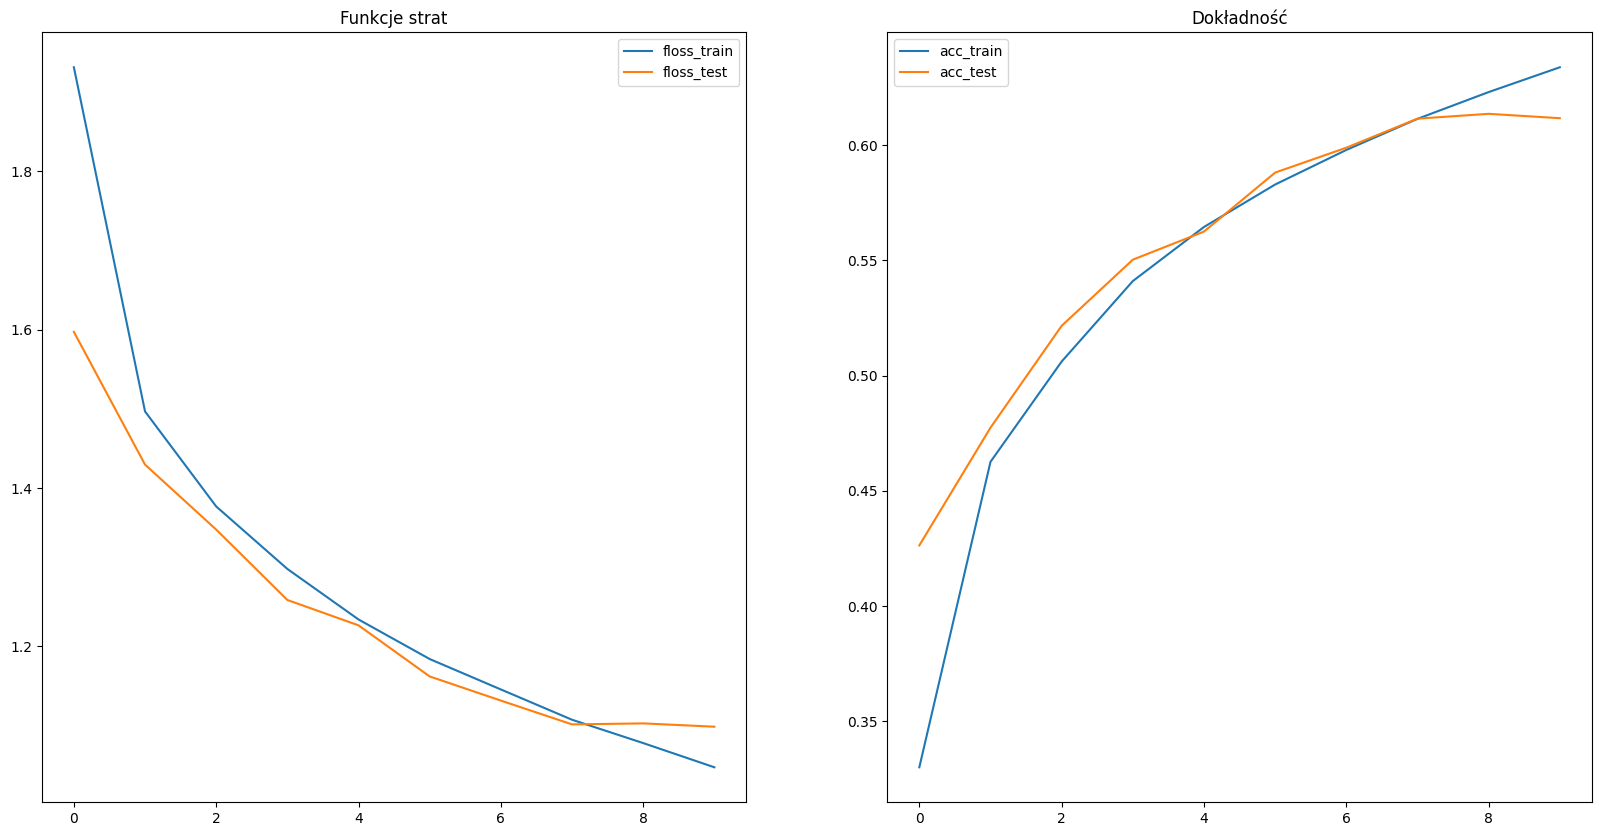

In [1]:
#%%IMPORTS
from keras.layers import Conv2D, Flatten, Dense, AveragePooling2D, MaxPooling2D
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.datasets import mnist, cifar10
import matplotlib.pyplot as plt
import numpy as np
#%%PARAMETERS DEFINING

filter_cnt = 32
neuron_cnt = 32
learning_rate = 0.0001
act_func = 'relu'
kernel_size = (3,3)
pooling_size = (2,2)
conv_rule = 'same'
layers_cnt = 4
#%%DATA LOAD AND SPLIT FOR 7.2 AND 7.3
train, test = mnist.load_data()
X_train, y_train = train[0], train[1]
X_test, y_test = test[0], test[1]
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

class_cnt = np.unique(y_train).shape[0]

#%%LAB7EX2
#BUILDING MODEL
def build_model(num_of_layers):
  model = Sequential()
  model.add(Conv2D(input_shape = X_train.shape[1:], filters=filter_cnt, kernel_size = kernel_size, padding = conv_rule, activation = act_func,name="Input"))

  for _ in range(num_of_layers):
    model.add(Conv2D(filters=filter_cnt, kernel_size=kernel_size,padding = conv_rule,activation = act_func))

  model.add(Flatten())
  model.add(Dense(class_cnt, activation='softmax'))
  model.compile(optimizer=Adam(learning_rate),loss='SparseCategoricalCrossentropy',metrics='accuracy')

  return model

#GRID SEARCH
param_distribs = {
    'num_of_layers': np.arange(5)
}
keras_classifier=KerasClassifier(build_model)
grid_search_cv=GridSearchCV(keras_classifier, param_distribs)
grid_search_cv.fit(X_train, y_train, epochs=class_cnt)

best_params=grid_search_cv.best_params_

print("Najlepsze parametry: {}".format(best_params))
#%%LAB7EX3
#BUILDING MODEL
def build_model(pooling_type):
  model = Sequential()
  model.add(Conv2D(input_shape = X_train.shape[1:], filters=filter_cnt, kernel_size = kernel_size, padding = conv_rule, activation = act_func,name="Input"))
  if(pooling_type != None):
    model.add(pooling_type(pooling_size))

  for _ in range(layers_cnt-1):
    model.add(Conv2D(filters=filter_cnt, kernel_size=kernel_size,padding = conv_rule,activation = act_func))
    if(pooling_type != None):
      model.add(pooling_type(pooling_size))

  model.add(Flatten())
  model.add(Dense(class_cnt, activation='softmax'))
  model.compile(optimizer=Adam(learning_rate),loss='SparseCategoricalCrossentropy',metrics='accuracy')

  return model

#GRID SEARCH
param_distribs = {
    'pooling_type': [None,MaxPooling2D,AveragePooling2D]
}

for pooling_type in param_distribs['pooling_type']:
  model = build_model(pooling_type)
  model.fit(x = X_train, y = y_train, epochs = class_cnt,validation_data=(X_test, y_test))

#CHARTS OF MODEL HISTORY
  history = model.history.history
  floss_train = history['loss']
  floss_test = history['val_loss']
  acc_train = history['accuracy']
  acc_test = history['val_accuracy']
  fig,ax = plt.subplots(1,2, figsize=(20,10))

  epochs = np.arange(0, class_cnt)
  ax[0].plot(epochs, floss_train, label = 'floss_train')
  ax[0].plot(epochs, floss_test, label = 'floss_test')
  ax[0].set_title('Funkcje strat')
  ax[0].legend()
  ax[1].set_title('Dokładność')
  ax[1].plot(epochs, acc_train, label = 'acc_train')
  ax[1].plot(epochs, acc_test, label = 'acc_test')
  ax[1].legend()

  print("Najlepsza dokładność dla poolingu: {} na zbiorze testowym: {}".format(pooling_type,max(history['val_accuracy'])))
  print("Najlepsza (najmniejsza) strata dla poolingu: {} na zbiorze testowym: {}".format(pooling_type,min(history['val_loss'])))
#%%LAB7EX4
#DATA LOADING
(x_train, y_train),(x_test,y_test) = cifar10.load_data()
X_train = x_train
X_test = x_test
class_cnt = np.unique(y_train).shape[0]

#BUILDING MODEL
def build_model(num_of_layers):
  model = Sequential()
  model.add(Conv2D(input_shape = X_train.shape[1:], filters=filter_cnt, kernel_size = kernel_size, padding = conv_rule, activation = act_func,name="Input"))
  model.add(AveragePooling2D(pooling_size))

  for _ in range(num_of_layers):
    model.add(Conv2D(filters=filter_cnt, kernel_size=kernel_size,padding = conv_rule,activation = act_func))
    model.add(AveragePooling2D(pooling_size))

  model.add(Flatten())
  model.add(Dense(class_cnt, activation='softmax'))
  model.compile(optimizer=Adam(learning_rate),loss='SparseCategoricalCrossentropy',metrics='accuracy')

  return model

#GRID SEARCH
param_distribs = {
    'num_of_layers': np.arange(5)
}
keras_classifier=KerasClassifier(build_model)
grid_search_cv=GridSearchCV(keras_classifier, param_distribs)
grid_search_cv.fit(X_train, y_train, epochs=class_cnt)

best_params=grid_search_cv.best_params_

print("Najlepsze parametry: {}".format(best_params))

#BUILD BEST MODEL
best_model = build_model(**best_params)
best_model.fit(x = X_train, y = y_train, epochs = class_cnt,validation_data=(X_test, y_test))

#CHARTS OF MODEL HISTORY
history = best_model.history.history
floss_train = history['loss']
floss_test = history['val_loss']
acc_train = history['accuracy']
acc_test = history['val_accuracy']
fig,ax = plt.subplots(1,2, figsize=(20,10))

epochs = np.arange(0, class_cnt)
ax[0].plot(epochs, floss_train, label = 'floss_train')
ax[0].plot(epochs, floss_test, label = 'floss_test')
ax[0].set_title('Funkcje strat')
ax[0].legend()
ax[1].set_title('Dokładność')
ax[1].plot(epochs, acc_train, label = 'acc_train')
ax[1].plot(epochs, acc_test, label = 'acc_test')
ax[1].legend()

y_prob = best_model.predict(X_test);
y_pred = y_prob.argmax(axis=-1)
print("Macierz pomyłek:")
print(confusion_matrix(y_test,y_pred))